In [163]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from keras import layers
from keras import models
from keras import optimizers

## Carico dati

In [126]:
X_train = pickle.load(open("x_train.obj", "rb"))

#X_test = pickle.load(open("x_test.obj", "rb"))

y_train = pickle.load(open("y_train.obj", "rb"))

In [127]:
print(X_train.shape)

print(y_train.shape)

(14000, 28, 28)
(14000,)


In [128]:
X_train, X_test, y_train, y_test =  train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train, random_state = 123)

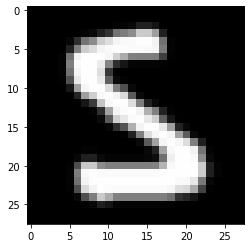

In [129]:
plt.imshow(X_train[0], cmap="gray") # Lettera s

In [130]:
print(y_train[0]) # Lettera s

19


In [131]:
y_train # è gia mescolato il datset

array([19, 22, 23, ..., 17, 21, 21], dtype=uint8)

In [132]:
target = pd.DataFrame(y_train)
target.columns = ["TARGET"]

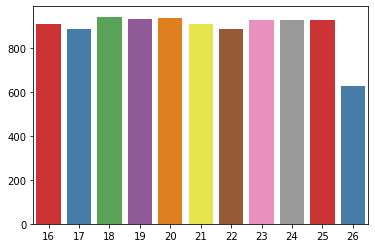

In [133]:
sns.barplot(target["TARGET"].value_counts().index, target["TARGET"].value_counts().values, palette="Set1")

## nella variabile obiettivo non c'è troppa sproporzione

## Reshape e normalizzazione colore

In [134]:
IMG_SIZE = 28
X_train = X_train.reshape(-1, IMG_SIZE,IMG_SIZE, 1)
X_train = X_train/255.0

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test/255.0

In [135]:
y_train = pd.Series(y_train) - 16
y_test = pd.Series(y_test) - 16

## Rete Neurale

In [190]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), input_shape=(IMG_SIZE, IMG_SIZE, 1), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(11, activation = "sigmoid"))

In [191]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["acc"])

In [192]:
history = model.fit(X_train, y_train, 
          batch_size = 32, 
          epochs = 10, 
          validation_split = 0.3)

Train on 6860 samples, validate on 2940 samples
Epoch 1/10
6860/6860 [==============================] - 9s 1ms/step - loss: 1.1503 - acc: 0.6292 - val_loss: 0.5883 - val_acc: 0.8224
Epoch 2/10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.5505 - acc: 0.8270 - val_loss: 0.4076 - val_acc: 0.8759
Epoch 3/10
6860/6860 [==============================] - 11s 2ms/step - loss: 0.3997 - acc: 0.8723 - val_loss: 0.3077 - val_acc: 0.9085
Epoch 4/10
6860/6860 [==============================] - 12s 2ms/step - loss: 0.3191 - acc: 0.9006 - val_loss: 0.2633 - val_acc: 0.9228
Epoch 5/10
6860/6860 [==============================] - 11s 2ms/step - loss: 0.2780 - acc: 0.9128 - val_loss: 0.2566 - val_acc: 0.9269
Epoch 6/10
6860/6860 [==============================] - 13s 2ms/step - loss: 0.2497 - acc: 0.9270 - val_loss: 0.2299 - val_acc: 0.9327
Epoch 7/10
6860/6860 [==============================] - 12s 2ms/step - loss: 0.2215 - acc: 0.9324 - val_loss: 0.2085 - val_acc: 0.9422
Epoch 8/1

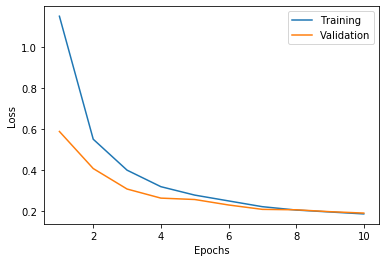

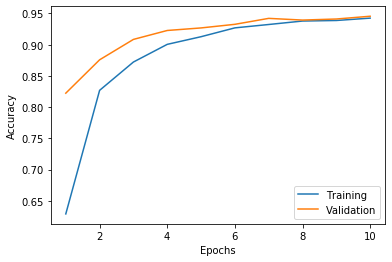

In [193]:
x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['acc'])
    plt.plot(x_plot, network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'])

    
plot_history(history)

In [194]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size = 32)
print("TEST LOSS:", test_loss)
print("TEST ACCURACY:", test_acc)

4200/4200 [==============================] - 1s 347us/step
TEST LOSS: 0.18617912572054635
TEST ACCURACY: 0.9457142857142857


In [174]:
y_test_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95       388
          1       0.92      0.93      0.93       379
          2       0.92      0.91      0.91       404
          3       0.98      0.99      0.98       399
          4       0.92      0.95      0.94       401
          5       0.90      0.93      0.92       389
          6       0.87      0.90      0.88       381
          7       0.97      0.92      0.94       398
          8       0.93      0.95      0.94       397
          9       0.92      0.89      0.91       396
         10       0.96      0.97      0.96       268

avg / total       0.93      0.93      0.93      4200

